In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/final_data.csv')

# Replace "relaxed" with "sitting" in both "Activity" and "Source" columns
data['Activity'] = data['Activity'].replace('relaxed', 'sitting')
data['Source'] = data['Source'].replace('relaxed', 'sitting')

# Check the unique values in the Activity and Source columns to verify changes
data['Activity'].unique(), data['Source'].unique()

# Define the conditions and values for the new columns
conditions_phone_pos = [
    data['Activity'].isin(['walking', 'running', 'stairs']),
    data['Activity'].isin(['sitting'])
]
values_phone_pos = ['hand', 'pocket']

conditions_environment = [
    data['Activity'].isin(['sitting', 'running', 'stairs']),
    data['Activity'].isin(['walking'])
]
values_environment = ['indoors', 'outdoors']

conditions_tired = [
    data['Activity'].isin(['stairs', 'running']),
    data['Activity'].isin(['sitting', 'walking'])
]
values_tired = ['yes', 'no']
# Create the new columns using the conditions and values
data['phone_pos'] = np.select(conditions_phone_pos, values_phone_pos, default='unknown')
data['environment'] = np.select(conditions_environment, values_environment, default='unknown')
data['tired'] = np.select(conditions_tired, values_tired, default='unknown')

data.to_csv('./data/final_data.csv', index=False)

In [3]:
# Apply a rolling median with a window size of 20, adjusting min_periods
data['Heart Rate (bpm)'] = data.groupby('Activity')['Heart Rate (bpm)'].transform(
    lambda x: x.rolling(window=20, min_periods=1).median())  # Adjust min_periods to 10

# Fill initial NaNs using forward fill directly
data['Heart Rate (bpm)'] = data['Heart Rate (bpm)'].ffill()

# Optionally, apply backward fill to address any remaining NaNs directly
data['Heart Rate (bpm)'] = data['Heart Rate (bpm)'].bfill()

#check for missing values
data.isnull().sum()
data.to_csv('./data/final_data.csv', index=False)

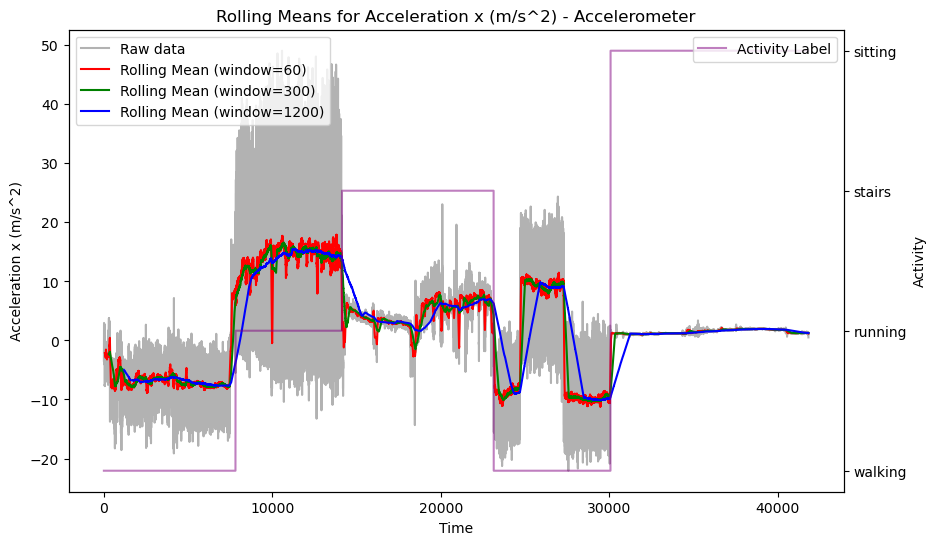

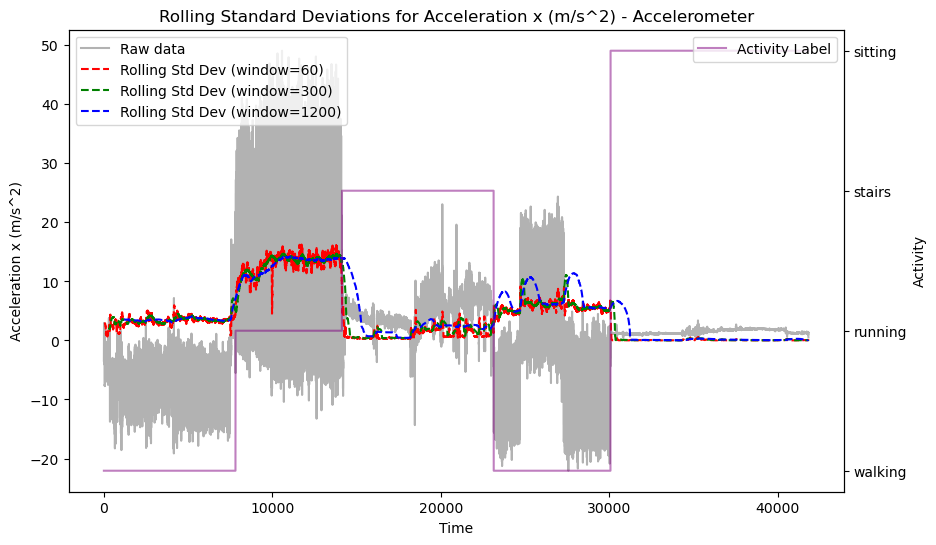

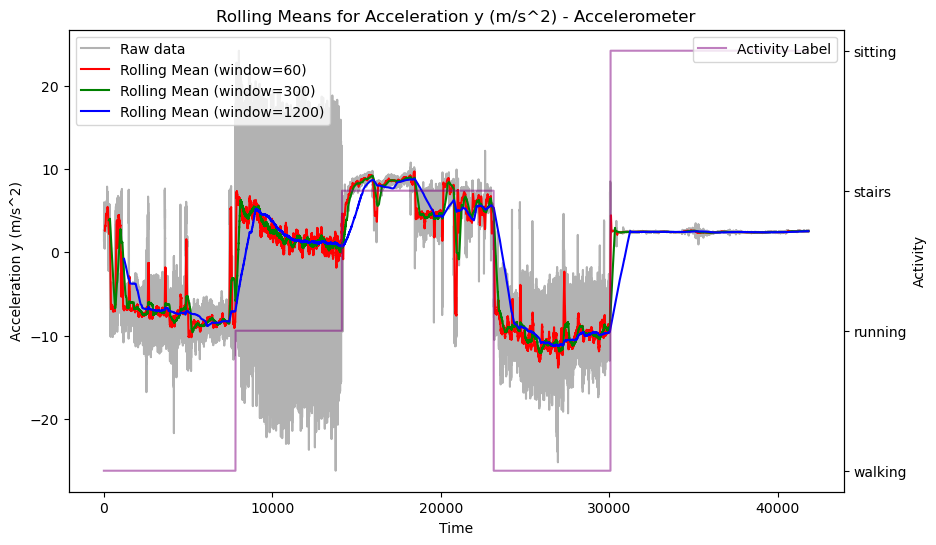

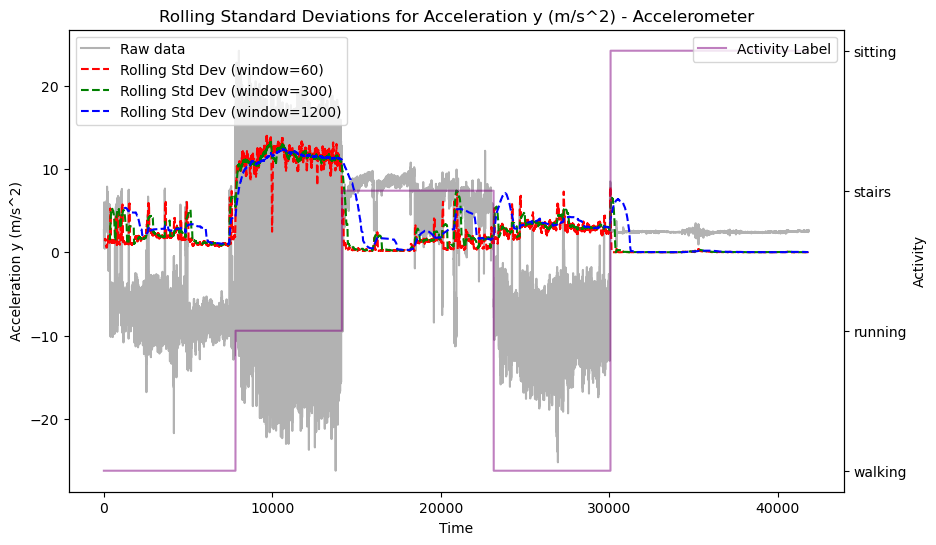

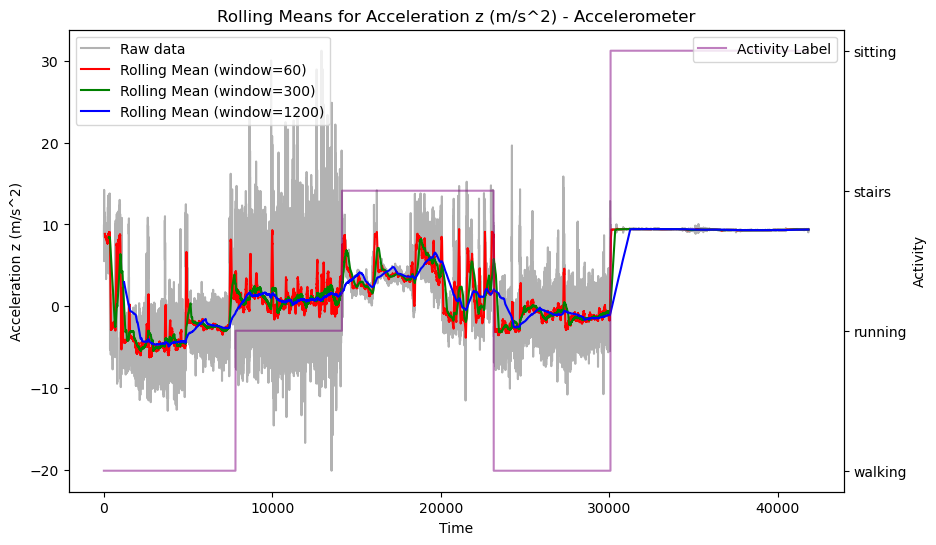

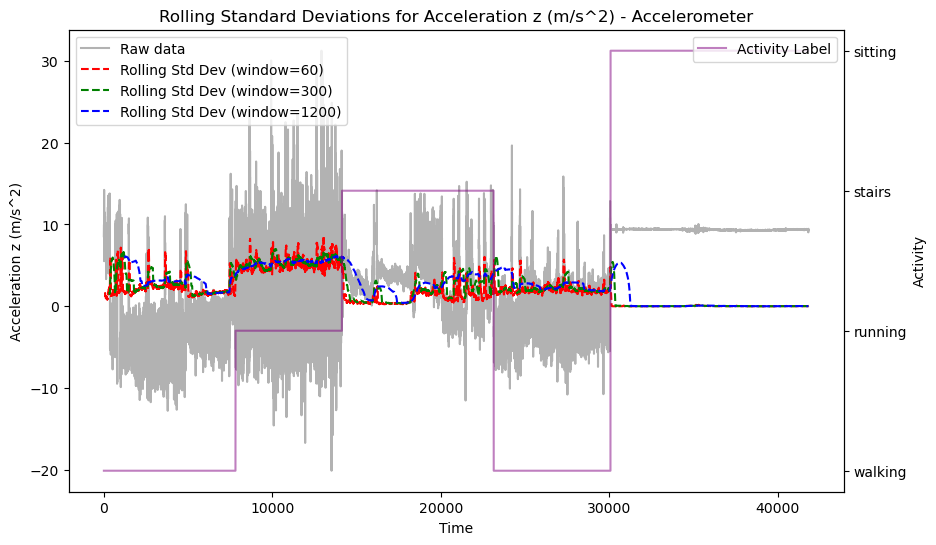

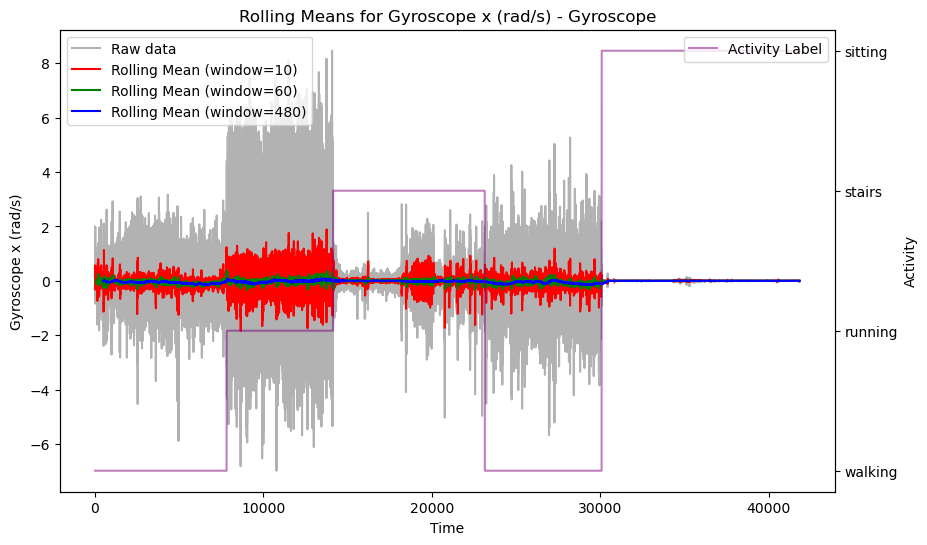

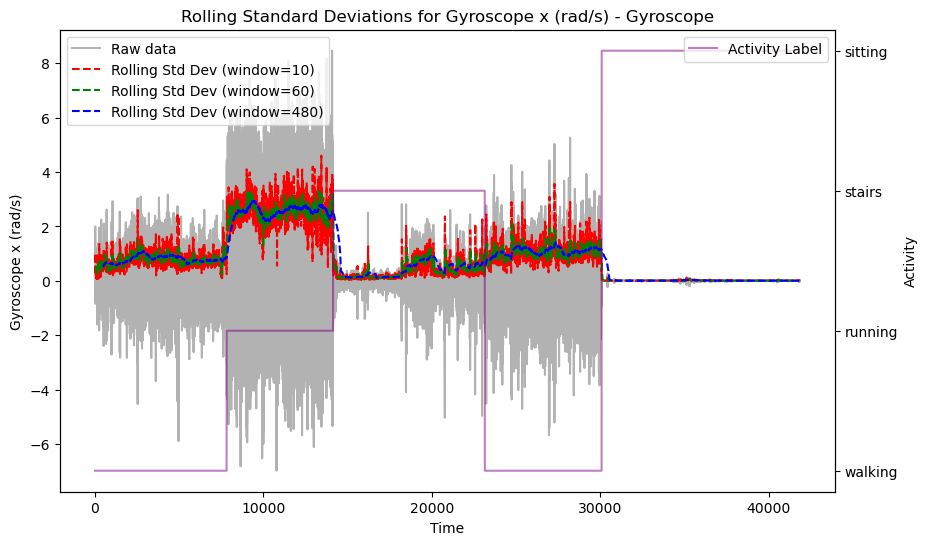

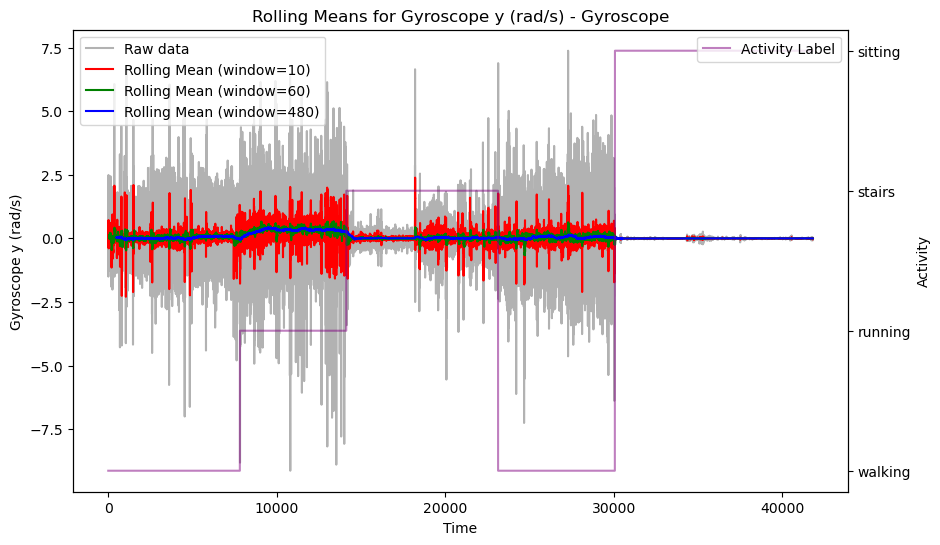

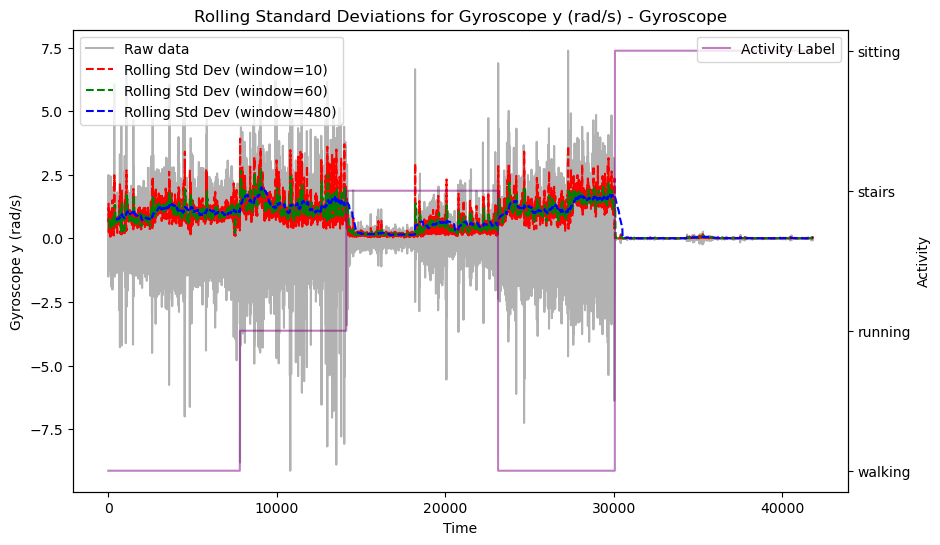

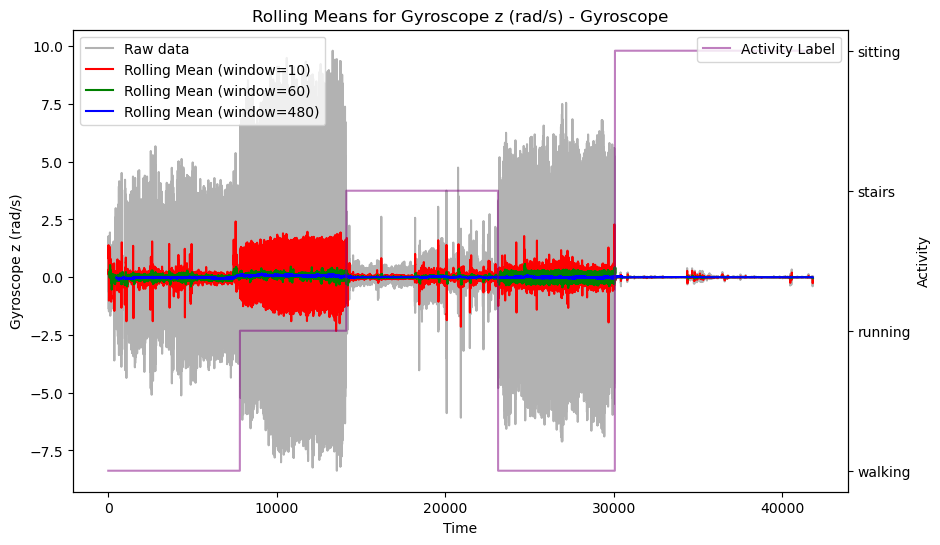

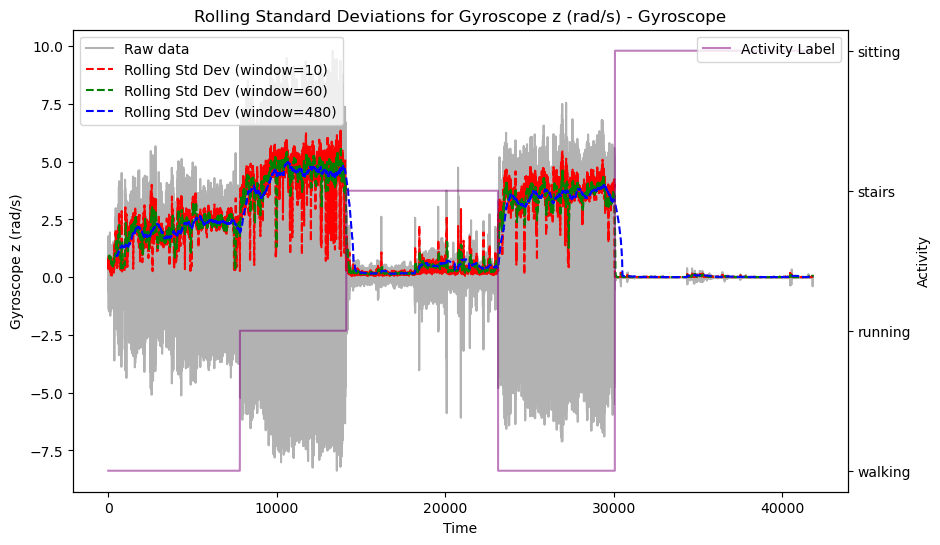

In [4]:
# Define the sensor data columns to be analyzed
accelerometer_columns = [
    'Acceleration x (m/s^2)', 'Acceleration y (m/s^2)', 'Acceleration z (m/s^2)'
]
gyroscope_columns = [
    'Gyroscope x (rad/s)', 'Gyroscope y (rad/s)', 'Gyroscope z (rad/s)'
]

# Define window sizes in terms of number of instances
accel_window_sizes = [60, 300, 1200]  # Corresponding to 5s, 30s, and 5 minutes
gyro_window_sizes = [10, 60, 480]

# Function to plot data
# Function to plot data
def plot_sensor_data(sensor_columns, window_sizes, sensor_type):
    for sensor_column in sensor_columns:
        fig_mean, ax_mean = plt.subplots(figsize=(10, 6))
        fig_std, ax_std = plt.subplots(figsize=(10, 6))

        ax_mean.plot(data[sensor_column], label='Raw data', color='black', alpha=0.3)
        ax_std.plot(data[sensor_column], label='Raw data', color='black', alpha=0.3)

        colors = ['red', 'green', 'blue']
        
        for window, color in zip(window_sizes, colors):
            rolling_mean = data[sensor_column].rolling(window=window).mean()
            rolling_std = data[sensor_column].rolling(window=window).std()

            ax_mean.plot(rolling_mean, label=f'Rolling Mean (window={window})', color=color)
            ax_std.plot(rolling_std, label=f'Rolling Std Dev (window={window})', color=color, linestyle='--')
        
        # Secondary axis for activity labels
        ax2_mean = ax_mean.twinx()
        ax2_std = ax_std.twinx()
        
        ax2_mean.plot(data['Activity'], label='Activity Label', color='purple', alpha=0.5)
        ax2_std.plot(data['Activity'], label='Activity Label', color='purple', alpha=0.5)

        ax2_mean.set_ylabel('Activity')
        ax2_std.set_ylabel('Activity')

        ax_mean.set_title(f'Rolling Means for {sensor_column} - {sensor_type}')
        ax_mean.set_xlabel('Time')
        ax_mean.set_ylabel(sensor_column)
        ax_mean.legend(loc='upper left')

        ax_std.set_title(f'Rolling Standard Deviations for {sensor_column} - {sensor_type}')
        ax_std.set_xlabel('Time')
        ax_std.set_ylabel(sensor_column)
        ax_std.legend(loc='upper left')

        ax2_mean.legend(loc='upper right')
        ax2_std.legend(loc='upper right')

        plt.show()

# Plot accelerometer data with its specific window sizes
plot_sensor_data(accelerometer_columns, accel_window_sizes, 'Accelerometer')

# Plot gyroscope data with its specific window sizes
plot_sensor_data(gyroscope_columns, gyro_window_sizes, 'Gyroscope')


In [11]:
data = pd.read_csv('./data/final_data.csv')
# Define the sensor data columns for accelerometer and gyroscope
accelerometer_columns = [
    'Acceleration x (m/s^2)', 'Acceleration y (m/s^2)', 'Acceleration z (m/s^2)'
]
gyroscope_columns = [
    'Gyroscope x (rad/s)', 'Gyroscope y (rad/s)', 'Gyroscope z (rad/s)'
]

# Define the selected window sizes for accelerometer and gyroscope
accel_window_size = 300
gyro_window_size = 60

# Feature engineering for accelerometer data
for column in accelerometer_columns:
    mean_col_name = f'temporal_mean_{column.replace("(m/s^2)", "").lower()}'
    std_col_name = f'temporal_std_{column.replace("(m/s^2)", "").lower()}'
    
    data[mean_col_name] = data[column].rolling(window=accel_window_size, min_periods=1).mean()
    data[std_col_name] = data[column].rolling(window=accel_window_size, min_periods=1).std()
# Feature engineering for gyroscope data
for column in gyroscope_columns:
    mean_col_name = f'temporal_mean_{column.replace("(rad/s)", "").lower()}'
    std_col_name = f'temporal_std_{column.replace("(rad/s)", "").lower()}'
    
    data[mean_col_name] = data[column].rolling(window=gyro_window_size,min_periods=1).mean()
    data[std_col_name] = data[column].rolling(window=gyro_window_size,min_periods=1).std()


data = data.bfill()

# Save the updated dataframe with new features
data.to_csv('./data/engineered_data.csv', index=False)
data.head()


,Timestamp,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Activity,Source,Heart Rate (bpm),...,temporal_mean_acceleration y,temporal_std_acceleration y,temporal_mean_acceleration z,temporal_std_acceleration z,temporal_mean_gyroscope x,temporal_std_gyroscope x,temporal_mean_gyroscope y,temporal_std_gyroscope y,temporal_mean_gyroscope z,temporal_std_gyroscope z
0,2024-05-17 13:59:37.000,-3.420972,2.675691,8.604419,-0.272708,-0.055938,0.108734,walking,walking_1,88.0,...,2.675691,0.112364,8.604419,0.657109,-0.272708,0.157198,-0.055938,0.132447,0.108734,0.032396
1,2024-05-17 13:59:37.100,-2.785414,2.516785,9.533711,-0.050396,-0.243247,0.154549,walking,walking_1,88.0,...,2.596238,0.112364,9.069065,0.657109,-0.161552,0.157198,-0.149592,0.132447,0.131641,0.032396
2,2024-05-17 13:59:37.200,-2.401145,2.601779,9.402748,0.024251,-0.297064,0.217163,walking,walking_1,88.0,...,2.598085,0.079518,9.180293,0.503002,-0.099618,0.154477,-0.198749,0.126572,0.160149,0.054431
3,2024-05-17 13:59:37.300,-1.852633,2.452620,9.426451,0.075075,-0.044227,0.393336,walking,walking_1,88.0,...,2.561719,0.097496,9.241832,0.428745,-0.055944,0.153422,-0.160119,0.129033,0.218445,0.124777
4,2024-05-17 13:59:37.400,-1.564371,2.317587,9.644802,-0.019548,-0.074098,0.662544,walking,walking_1,88.0,...,2.512893,0.138018,9.322426,0.412727,-0.048665,0.133860,-0.142915,0.118183,0.307265,0.226101
